In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from astropy.table import Table

In [15]:
apogee = Table.read('/data/jls/GaiaDR2/spectro/APOGEE_distances.hdf5')
apogee_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/APOGEE_input.hdf5')
print 'Processed:',np.count_nonzero(apogee['flag']==0.), 'out of', len(apogee)

Processed: 211678 out of 258475


(array([0.00542714, 0.01245949, 0.03516174, 0.08729285, 0.21150553,
        0.39725127, 0.67319452, 0.68274934, 0.28802055, 0.10693756]),
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ,  1.4,  1.8,  2.2,  2.6,  3. ]),
 <a list of 1 Patch objects>)

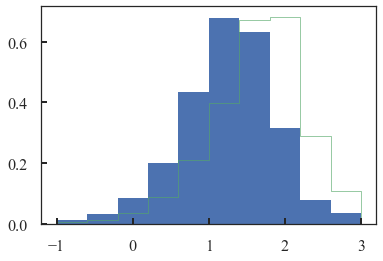

In [122]:
plt.hist(np.log10(apogee['JR'])[apogee['log10_age']<np.log10(3.)],range=[-1.,3.],normed=True)
plt.hist(np.log10(apogee['JR'])[apogee['log10_age']>np.log10(8.)],range=[-1.,3.],histtype='step',normed=True)

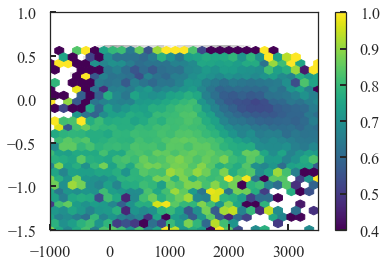

In [148]:
from matplotlib.colors import LogNorm
plt.hist2d(apogee['Lz'],apogee['Z'],bins=40,range=[[-1000.,3500.],[-1.5,1.]],norm=LogNorm());
plt.hexbin(apogee['Lz'],apogee['Z'],C=apogee['log10_age'],
           extent=[-1000.,3500.,-1.5,1.],
           gridsize=30,vmin=0.4,vmax=1.,reduce_C_function=np.nanmedian,cmap=plt.cm.viridis);
plt.colorbar()

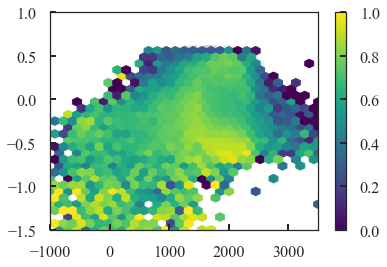

In [150]:
from matplotlib.colors import LogNorm
plt.hist2d(galah['Lz'],galah['Z'],bins=40,range=[[-1000.,3500.],[-1.5,1.]],norm=LogNorm());
plt.hexbin(galah['Lz'],galah['Z'],C=galah['log10_age'],
           extent=[-1000.,3500.,-1.5,1.],
           gridsize=30,vmin=0.,vmax=1.,reduce_C_function=np.nanmedian,cmap=plt.cm.viridis);
plt.colorbar()

In [106]:
!ls -lt /data/jls/GaiaDR2/spectro/RAVE_DR5_distances.hdf5

-rw-r--r-- 1 jls jls 89094994 Apr 27 01:30 /data/jls/GaiaDR2/spectro/RAVE_DR5_distances.hdf5


In [33]:
rave = Table.read('/data/jls/GaiaDR2/spectro/RAVE_DR5_distances.hdf5')
rave_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/RAVE_input.hdf5')
print 'Processed:', np.count_nonzero(rave['flag']==0.), 'out of', len(rave)

Processed: 184607 out of 457555


In [29]:
ges = Table.read('/data/jls/GaiaDR2/spectro/GES_distances.hdf5')
ges_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/GES_input.hdf5')
print 'Processed:', np.count_nonzero(ges['flag']==0.), 'out of', len(ges)

Processed: 29620 out of 54525


In [28]:
galah = Table.read('/data/jls/GaiaDR2/spectro/GALAH_distances.hdf5')
galah_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/GALAH_input.hdf5')
print 'Processed:', np.count_nonzero(galah['flag']==0.), 'out of', len(galah)

Processed: 263694 out of 342682


In [37]:
def input_output(inputs, data):
    f,a=plt.subplots(1,2,figsize=[10.,3.])
    plt.sca(a[0])
    plt.scatter(np.log10(inputs['teff']),inputs['logg'],
                c=inputs['fe_h'],s=1,cmap=plt.cm.viridis, alpha=0.3, vmin=-2., vmax=0.5);
    plt.xlabel('Input log10teff')
    plt.ylabel('Input logg')
    plt.colorbar(label='Input [M/H]')
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xlim(4.,3.4)
    plt.ylim(5.5,-0.5)
    plt.sca(a[1])
    plt.scatter(data['log10_teff'],data['logg'],c=data['Z'],s=1,
                cmap=plt.cm.viridis, alpha=0.3, vmin=-2., vmax=0.5);
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xlabel('Output log10teff')
    plt.ylabel('Output logg')
    plt.colorbar(label='Output [M/H]')
    plt.xlim(4.,3.4)
    plt.ylim(5.5,-0.5)
    plt.tight_layout()

In [89]:
!ls -lt /data/jls/GaiaDR2/spectro/GALAH_input.hdf5

-rw-r--r-- 1 jls jls 374589436 Apr 26 11:21 /data/jls/GaiaDR2/spectro/GALAH_input.hdf5


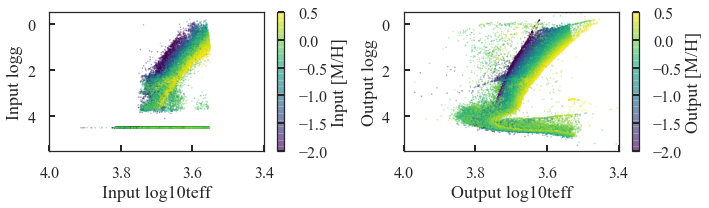

In [169]:
input_output(apogee_inputs,apogee)
plt.savefig('apogee_diagram.pdf', bbox_inches='tight')

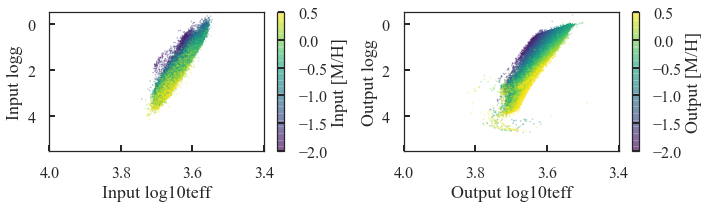

In [39]:
input_output(rave_inputs,rave)

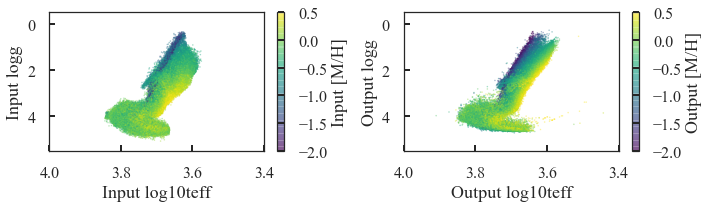

In [40]:
input_output(galah_inputs,galah)

(array([8.39710e+04, 1.00994e+05, 4.81970e+04, 2.04570e+04, 5.54400e+03,
        2.59600e+03, 1.27100e+03, 3.70000e+02, 1.42000e+02, 6.10000e+01]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 ]),
 <a list of 10 Patch objects>)

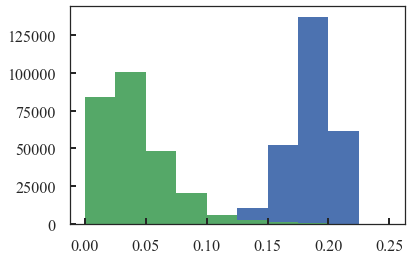

In [101]:
plt.hist(galah_inputs['e_logg'],range=[0.,0.25])
plt.hist(galah['logg_err'],range=[0.,0.25])

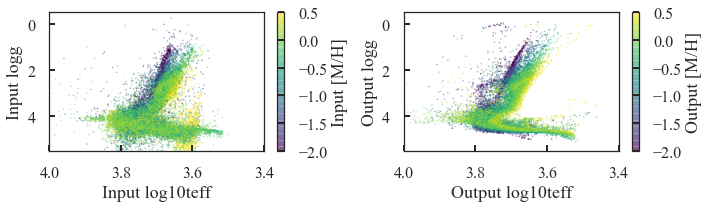

In [41]:
input_output(ges_inputs, ges)

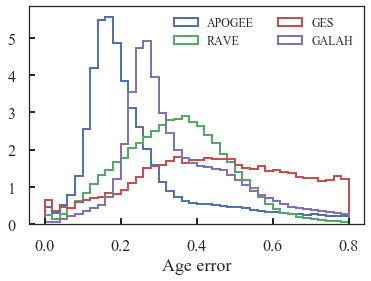

In [176]:
plt.hist(apogee['log10_age_err']*np.log(10.),range=[0.,0.8],histtype='step',lw=2,bins=40,normed=True,label='APOGEE');
plt.hist(rave['log10_age_err']*np.log(10.),range=[0.,.8],histtype='step',lw=2,bins=40,normed=True,label='RAVE');
plt.hist(ges['log10_age_err']*np.log(10.),range=[0.,.8],histtype='step',lw=2,bins=40,normed=True,label='GES');
plt.hist(galah['log10_age_err']*np.log(10.),range=[0.,.8],histtype='step',lw=2,bins=40,normed=True,label='GALAH');
plt.legend(ncol=2,fontsize=12)
plt.xlabel('Age error')
plt.savefig('age_error.pdf', bbox_inches='tight')

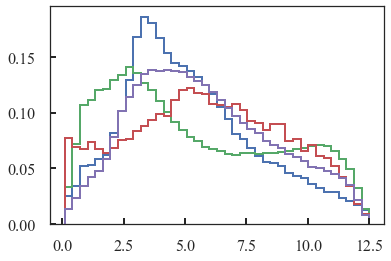

In [62]:
plt.hist(np.power(10.,apogee['log10_age']),range=[0.1,12.5],histtype='step',lw=2,bins=40,normed=True);
plt.hist(np.power(10.,rave['log10_age']),range=[0.1,12.5],histtype='step',lw=2,bins=40,normed=True);
plt.hist(np.power(10.,ges['log10_age']),range=[0.1,12.5],histtype='step',lw=2,bins=40,normed=True);
plt.hist(np.power(10.,galah['log10_age']),range=[0.1,12.5],histtype='step',lw=2,bins=40,normed=True);

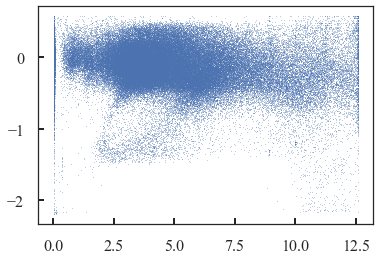

In [72]:
plt.plot(np.power(10.,apogee['log10_age'])[apogee['log10_age_err']<0.1],
         apogee['Z'][apogee['log10_age_err']<0.1],'.',ms=1)
# plt.plot(np.power(10.,galah['log10_age']),
#          galah['Z'],'.',ms=2)

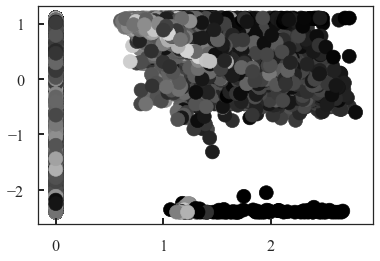

In [76]:
plt.scatter(apogee_inputs['mass'],apogee['log10_age'],c=apogee['Z'])